# Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading Dataset

In [13]:
data=pd.read_csv("ToyotaCorolla.csv")

# Exploring dataset

In [15]:
data.head(10)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,?TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,?TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


In [17]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

# Exploring the descriptive statistics of dataset

In [19]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploring the PDFs

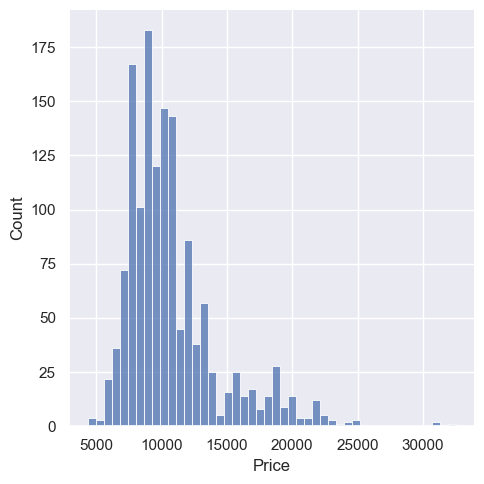

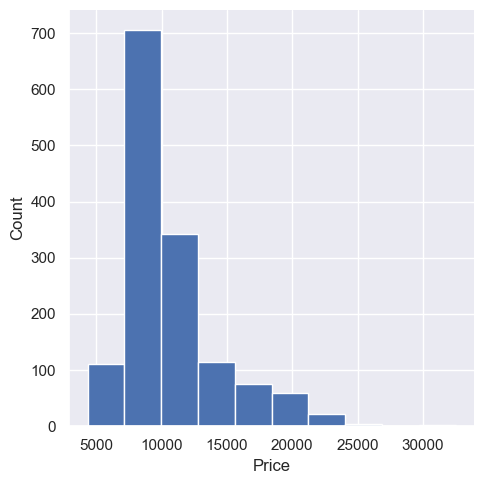

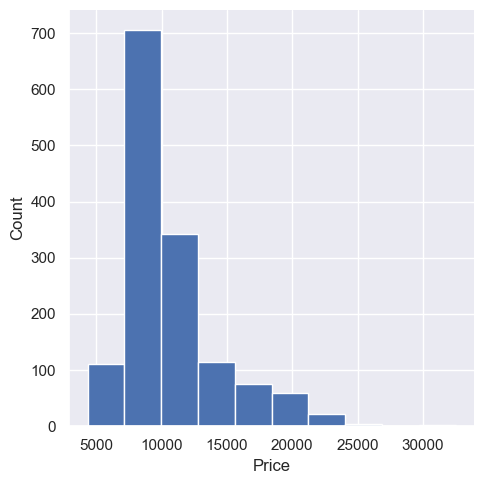

In [34]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.displot(data1["Price"])
plt.hist(data1["Price"])
plt.show()

In [35]:
q = data1['Price'].quantile(0.99)
data2 = data1[data1['Price']<q]

In [37]:
sns.displot(data2["Price"])

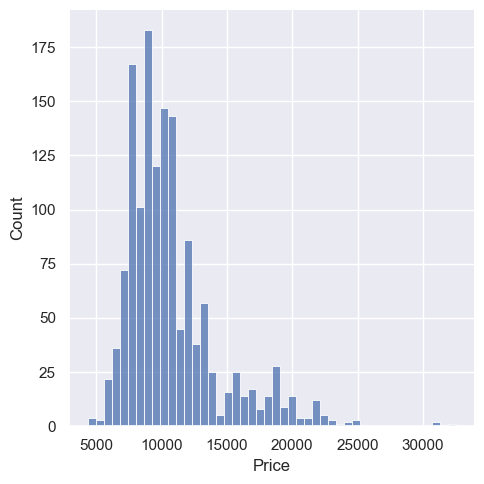

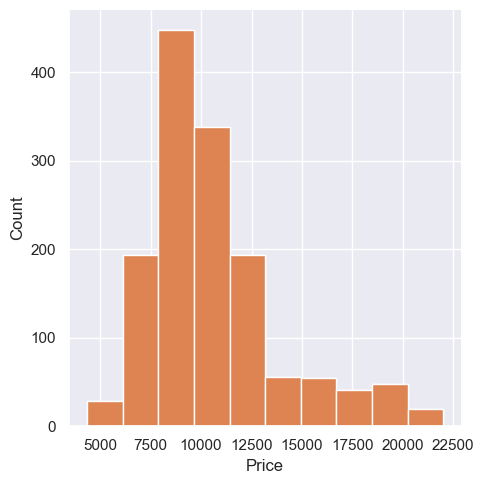

In [39]:
plt.hist(data2["Price"])
plt.show()

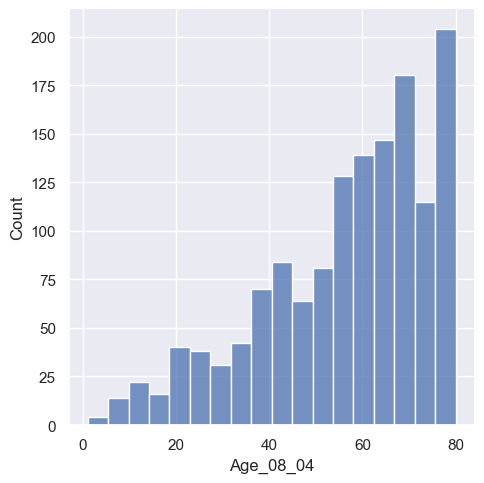

In [40]:
sns.displot(data2["Age_08_04"])
plt.show()

In [41]:
q=data2["Age_08_04"].quantile(0.01)
data3=data2[data2["Age_08_04"]>q]

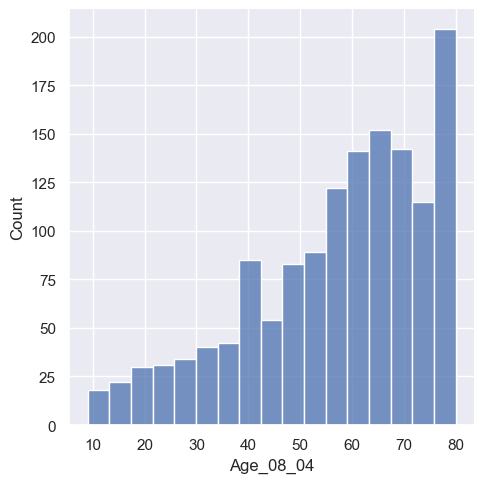

In [42]:
sns.displot(data3["Age_08_04"])
plt.show()

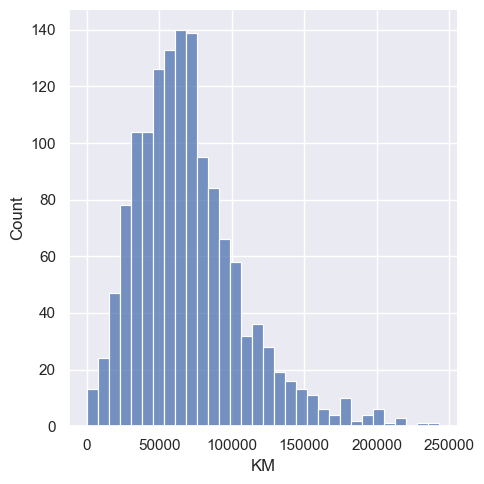

In [44]:
#data3["KM"] is looks like normaly distributed
sns.displot(data3["KM"])
plt.show()

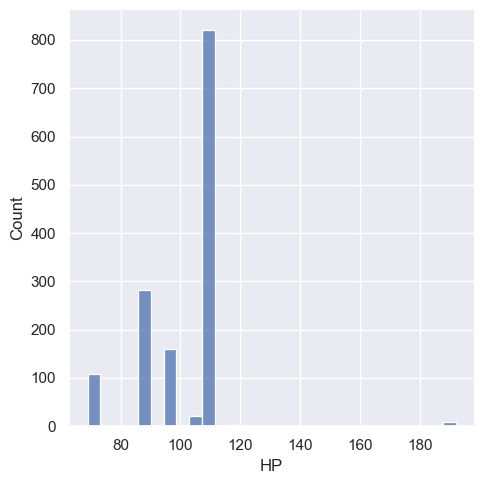

In [46]:
# HP having some outleirs,lets remove these outliers
sns.displot(data3["HP"])
plt.show()

In [47]:
q=data3["HP"].quantile(0.99)
data4=data3[data3["HP"]<q]

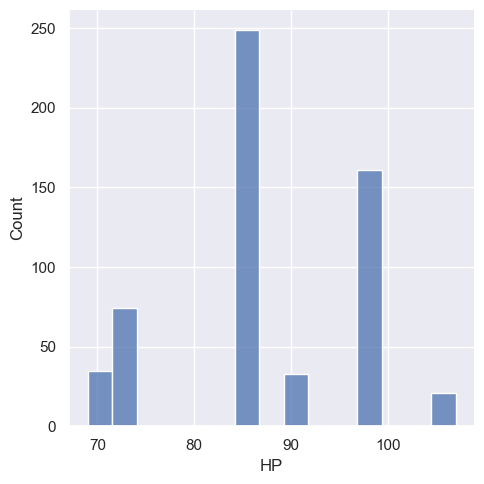

In [48]:
sns.displot(data4["HP"])
plt.show()

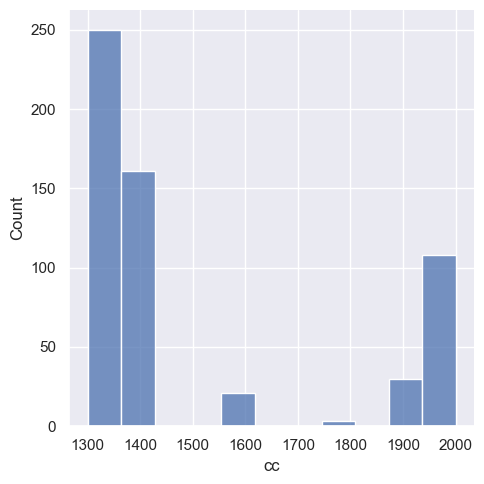

In [50]:
sns.displot(data4["cc"])
plt.show()

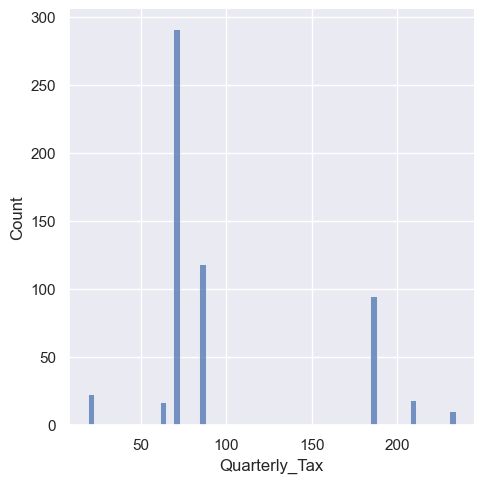

In [72]:
sns.displot(data4["Quarterly_Tax"])
plt.show()

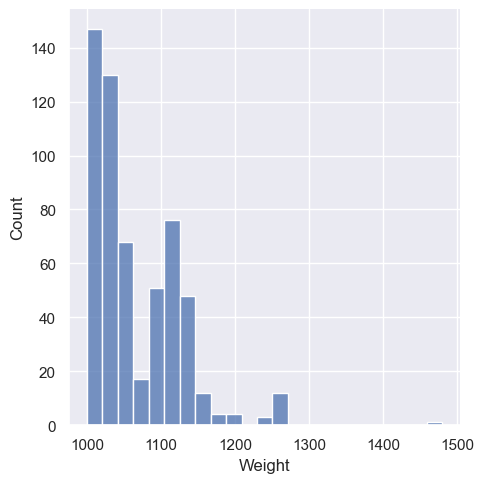

In [73]:
sns.displot(data4["Weight"])
plt.show()

In [74]:
q=data4["Weight"].quantile(0.99)


In [75]:
data5=data4[data4["Weight"]<q]

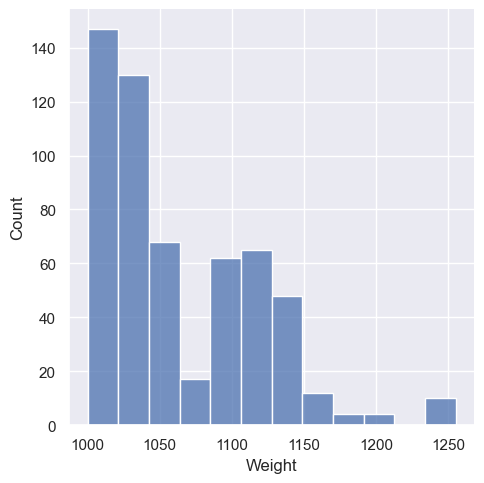

In [76]:
sns.displot(data5["Weight"])
plt.show()

# Checking the OLS assumssions

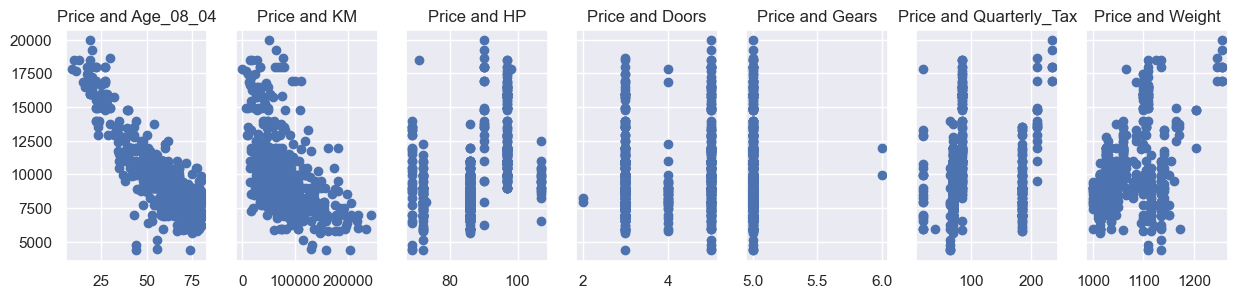

In [91]:
f, (ax1, ax2, ax3,ax4,ax5,ax6,ax7) = plt.subplots(1, 7, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data5['Age_08_04'],data5['Price'])
ax1.set_title('Price and Age_08_04')
ax2.scatter(data5['KM'],data5['Price'])
ax2.set_title('Price and KM')
ax3.scatter(data5['HP'],data5['Price'])
ax3.set_title('Price and HP')
ax4.scatter(data5['Doors'],data5['Price'])
ax4.set_title('Price and Doors')
ax5.scatter(data5['Gears'],data5['Price'])
ax5.set_title('Price and Gears')
ax6.scatter(data5['Quarterly_Tax'],data5['Price'])
ax6.set_title('Price and Quarterly_Tax')
ax7.scatter(data5['Weight'],data5['Price'])
ax7.set_title('Price and Weight')
plt.show()

From above scatterplot we can decide that price is linearly distributed and we can fit it into the linear model.

# Creation of regression Model

We are going to create regression model using following features
"Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"

In [92]:
data5

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,8450,80,23000,86,1300,3,5,69,1015
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015


In [93]:
data5.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,10037.500882,56.751323,75848.366843,87.229277,1501.097002,3.839506,5.003527,96.155203,1064.571429
std,2916.941565,17.388206,44091.906473,9.666177,274.182910,0.958867,0.059339,51.395170,53.501013
min,4350.000000,9.000000,1.000000,69.000000,1300.000000,2.000000,5.000000,19.000000,1000.000000
25%,7950.000000,47.000000,44567.000000,86.000000,1300.000000,3.000000,5.000000,69.000000,1020.000000
50%,9400.000000,61.000000,67266.000000,86.000000,1400.000000,3.000000,5.000000,69.000000,1045.000000
75%,10950.000000,70.000000,96410.000000,97.000000,1600.000000,5.000000,5.000000,85.000000,1110.000000
max,19950.000000,80.000000,243000.000000,107.000000,2000.000000,5.000000,6.000000,234.000000,1255.000000


In [94]:
from sklearn.linear_model import LinearRegression

# Define variables

In [99]:
y=data5["Price"]
x=data5[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [100]:
reg=LinearRegression()

In [101]:
reg=reg.fit(x,y)

In [102]:
reg.score(x,y)

0.8661594891049257

In [103]:
reg.coef_

array([-8.63690844e+01, -1.64588569e-02,  2.13919935e+01, -5.07492689e+00,
       -9.30798661e+01,  5.36292926e+02,  1.05600294e+01,  3.15638821e+01])

In [104]:
reg.intercept_

-15003.996911651016